In [31]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/erikali/Desktop/QBIO/qbio_490_ErikaLi/analysis_data')

In [32]:
import cptac
cptac.download(dataset="Endometrial")
endometrial = cptac.Endometrial()

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.7. Please run 'pip install --upgrade cptac' to update it. (/Users/erikali/anaconda3/lib/python3.11/threading.py, line 975)


In [92]:
protein_data = endometrial.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

In [93]:
clinical_data = endometrial.get_clinical()
clinical_data

Name,Sample_ID,Sample_Tumor_Normal,Proteomics_Tumor_Normal,Country,Histologic_Grade_FIGO,Myometrial_invasion_Specify,Histologic_type,Treatment_naive,Tumor_purity,Path_Stage_Primary_Tumor-pT,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,S001,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,64.0,No,White,Not-Hispanic or Latino,Female,Anterior endometrium,NaN,Unifocal,2.9,1
C3L-00008,S002,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,58.0,No,White,Not-Hispanic or Latino,Female,Posterior endometrium,NaN,Unifocal,3.5,1
C3L-00032,S003,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,50.0,Yes,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,4.5,4 or more
C3L-00090,S005,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,75.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,3.5,4 or more
C3L-00098,S006,Tumor,Tumor,United States,NaN,under 50 %,Serous,YES,Normal,pT1a (FIGO IA),...,63.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,S140,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX6.N,S141,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX7.N,S142,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
clinical_data['Num_full_term_pregnancies'].value_counts()

Num_full_term_pregnancies
2            27
1            22
4 or more    13
Unknown      13
3             9
Name: count, dtype: int64

In [95]:
merged_data = pd.merge(protein_data, clinical_data, on='Patient_ID')
merged_data

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.1800,-0.8630,-0.802,0.222,0.256000,0.6650,1.2800,-0.3390,0.412,-0.66400,...,64.0,No,White,Not-Hispanic or Latino,Female,Anterior endometrium,NaN,Unifocal,2.9,1
C3L-00008,-0.6850,-1.0700,-0.684,0.984,0.135000,0.3340,1.3000,0.1390,1.330,-0.36700,...,58.0,No,White,Not-Hispanic or Latino,Female,Posterior endometrium,NaN,Unifocal,3.5,1
C3L-00032,-0.5280,-1.3200,0.435,NaN,-0.240000,1.0400,-0.0213,-0.0479,0.419,-0.50000,...,50.0,Yes,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,4.5,4 or more
C3L-00090,-1.6700,-1.1900,-0.443,0.243,-0.099300,0.7570,0.7400,-0.9290,0.229,-0.22300,...,75.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,3.5,4 or more
C3L-00098,-0.3740,-0.0206,-0.537,0.311,0.375000,0.0131,-1.1000,NaN,0.565,-0.10100,...,63.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,-0.0014,0.6160,-0.641,-0.204,0.027600,-1.4100,-0.4050,-0.5610,-0.373,0.12400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX6.N,0.2980,0.3950,-1.240,-0.178,-0.180000,-0.5910,-0.5980,0.4020,-0.384,0.15200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX7.N,0.1110,0.2100,-0.751,-0.335,0.000865,-1.3700,-0.2730,0.1060,-0.717,0.00865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
columns_to_remove = ['Age', 'Diabetes', 'Race', 'Ethnicity', 'Gender', 'Tumor_Site', 'Tumor_Site_Other', 'Tumor_Focality', 'Tumor_Size_cm',
    'Tumor_purity', 'Path_Stage_Primary_Tumor-pT', 'Path_Stage_Reg_Lymph_Nodes-pN',
    'Clin_Stage_Dist_Mets-cM', 'Path_Stage_Dist_Mets-pM', 'tumor_Stage-Pathological',
    'FIGO_stage', 'LVSI', 'BMI','Sample_ID', 'Sample_Tumor_Normal', 'Proteomics_Tumor_Normal', 'Country',
    'Histologic_Grade_FIGO', 'Myometrial_invasion_Specify', 'Histologic_type', 'Treatment_naive'
]

merged_data.drop(columns=columns_to_remove, inplace=True)

In [97]:
merged_data

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.1800,-0.8630,-0.802,0.222,0.256000,0.6650,1.2800,-0.3390,0.412,-0.66400,...,NaN,0.0229,0.1090,NaN,-0.33200,-0.43300,-1.020,-0.1230,-0.085900,1
C3L-00008,-0.6850,-1.0700,-0.684,0.984,0.135000,0.3340,1.3000,0.1390,1.330,-0.36700,...,NaN,0.3630,1.0700,0.737,-0.56400,-0.00461,-1.130,-0.0757,-0.473000,1
C3L-00032,-0.5280,-1.3200,0.435,NaN,-0.240000,1.0400,-0.0213,-0.0479,0.419,-0.50000,...,-0.1450,0.0105,-0.1160,NaN,0.15100,-0.07400,-0.540,0.3200,-0.419000,4 or more
C3L-00090,-1.6700,-1.1900,-0.443,0.243,-0.099300,0.7570,0.7400,-0.9290,0.229,-0.22300,...,-0.0552,-0.0714,0.0933,0.156,-0.39800,-0.07520,-0.797,-0.0301,-0.467000,4 or more
C3L-00098,-0.3740,-0.0206,-0.537,0.311,0.375000,0.0131,-1.1000,NaN,0.565,-0.10100,...,NaN,-1.2200,-0.5620,0.937,-0.64600,0.20700,-1.850,-0.1760,0.051300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NX5.N,-0.0014,0.6160,-0.641,-0.204,0.027600,-1.4100,-0.4050,-0.5610,-0.373,0.12400,...,0.1070,-0.1900,-1.3600,-1.100,-0.19700,-0.30700,0.682,0.0984,-0.020200,NaN
NX6.N,0.2980,0.3950,-1.240,-0.178,-0.180000,-0.5910,-0.5980,0.4020,-0.384,0.15200,...,0.1980,-0.0139,-0.8080,-0.324,0.16300,-0.14500,0.855,0.1160,-0.000114,NaN
NX7.N,0.1110,0.2100,-0.751,-0.335,0.000865,-1.3700,-0.2730,0.1060,-0.717,0.00865,...,0.3960,-0.3640,-1.6400,-1.480,0.45300,-0.16800,0.411,-0.1760,0.218000,NaN


In [98]:
merged_data['Num_full_term_pregnancies'].value_counts()

Num_full_term_pregnancies
2            27
1            22
4 or more    13
Unknown      13
3             9
Name: count, dtype: int64

## LOW-MEDIUM PREGNANCY ANALYSIS

In [73]:
mean_lowpregnancy = lowpregnancy_proteins.dropna(axis=1).mean()
sorted_lowproteins = mean_lowpregnancy.sort_values(ascending=False).dropna()
top_50_proteins = sorted_lowproteins.head(50)
print(f'Top Expressed Proteins in EC patients with <= 2 pregnancies')
print(top_50_proteins)

Top Expressed Proteins in EC patients with <= 2 pregnancies
Name
S100A2      1.124500
DKK4        0.982694
PRR9        0.965855
CAPS        0.937490
KRT5        0.917224
GLYATL2     0.876945
CLIC6       0.872757
AGR2        0.870500
RPL22L1     0.842847
AKR1B10     0.835050
AQP5        0.813756
HGD         0.812135
GBP5        0.810667
PLEKHS1     0.803329
IGF2BP3     0.764736
SCD         0.759004
PGK2        0.758914
KRT23       0.715819
CHGA        0.712143
CALML4      0.699782
S100A8      0.694392
AGMAT       0.692151
TFRC        0.688041
PYCR1       0.681320
SLPI        0.679103
S100A14     0.666673
CD74        0.664676
S100A9      0.664481
B4GALT5     0.656604
BCAT1       0.654048
SLC2A1      0.653261
CKMT1A      0.650112
KRT19       0.650030
RAB3D       0.644896
GMDS        0.641794
LAD1        0.640984
ABRACL      0.638445
S100A7      0.637204
LCN2        0.632304
KRT8        0.632094
NQO1        0.626604
C1orf116    0.624610
GDA         0.620596
IDH1        0.617720
STEAP1     

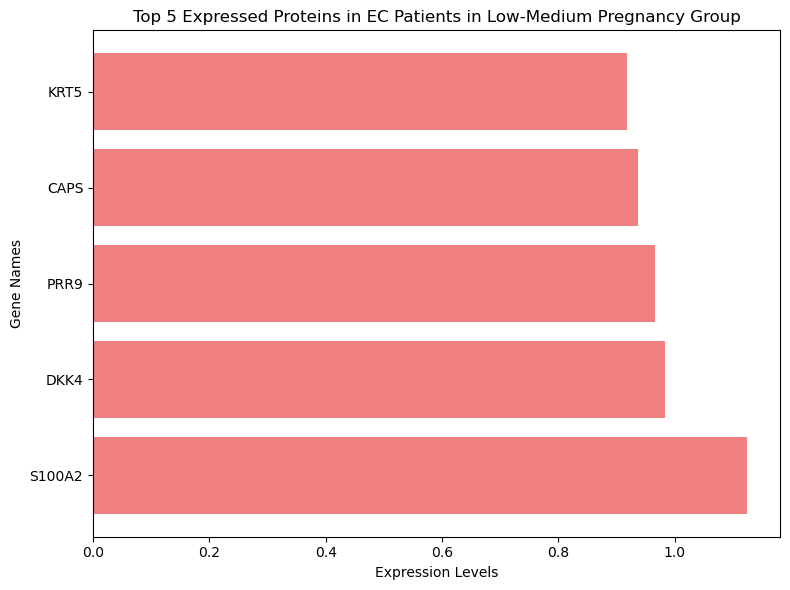

In [82]:
import matplotlib.pyplot as plt

# Data for EC patients with <= 2 pregnancies (excluding Num_full_term_pregnancies)
gene_names = [
    "S100A2", "DKK4", "PRR9", "CAPS", "KRT5"
]
expression_levels = [
    1.124500, 0.982694, 0.965855, 0.937490, 0.917224
]

# Creating the bar plot for top 5 genes
plt.figure(figsize=(8, 6))
plt.barh(gene_names, expression_levels, color='lightcoral')
plt.xlabel('Expression Levels')
plt.ylabel('Gene Names')
plt.title('Top 5 Expressed Proteins in EC Patients in Low-Medium Pregnancy Group')

plt.tight_layout()
plt.show()


- S100a2: induced by p53, important in cytoskeleton organization, regeneration of tissues, typically downregulated in most cancer tyoes
- DKK4: not much known, associated with increased survival for colorectal cancer patients
- PRR9: 
- CAPS: membrane-bound protein, neural/endocrine-specific
- KRT5: regulates melanin metabolism

In [117]:
from gprofiler import GProfiler

# Set your user agent string (replace 'Your_User_Agent' with an appropriate identifier)
user_agent = 'Your_User_Agent'

# Initialize g:Profiler with the user agent
gp = GProfiler(user_agent=user_agent)

# List of genes you want to perform enrichment analysis on
genes_of_interest = [
    'S100A2', 'DKK4', 'PRR9', 'CAPS', 'KRT5', 'GLYATL2', 'CLIC6', 'AGR2', 'RPL22L1', 'AKR1B10',
    'AQP5', 'HGD', 'GBP5', 'PLEKHS1', 'IGF2BP3', 'SCD', 'PGK2', 'KRT23', 'CHGA', 'CALML4', 'S100A8',
    'AGMAT', 'TFRC', 'PYCR1', 'SLPI', 'S100A14', 'CD74', 'S100A9', 'B4GALT5', 'BCAT1', 'SLC2A1',
    'CKMT1A', 'KRT19', 'RAB3D', 'GMDS', 'LAD1', 'ABRACL', 'S100A7', 'LCN2', 'KRT8', 'NQO1', 'C1orf116',
    'GDA', 'IDH1', 'STEAP1', 'IL18', 'S100A1', 'B4GALT1', 'ALDH18A1', 'IDO1', 'MYH7'
]


# Perform pathway enrichment analysis
enrichment_results = gp.gprofile(organism='hsapiens', query=genes_of_interest)

# Display pathway enrichment results
print(enrichment_results)

[[1, True, 5.87e-07, 6, 38, 4, 0.105, 0.667, 'REAC:R-HSA-6799990', 'rea', 1, 'Metal sequestration by antimicrobial proteins', 1, 'S100A8,S100A7,LCN2,S100A9'], [1, True, 1.08e-05, 1058, 50, 16, 0.32, 0.015, 'GO:0043436', 'BP', 1, 'oxoacid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A'], [1, True, 1.32e-05, 1073, 50, 16, 0.32, 0.015, 'GO:0006082', 'BP', 1, 'organic acid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A'], [1, True, 4.32e-05, 2133, 50, 21, 0.42, 0.01, 'GO:0070062', 'CC', 1, 'extracellular exosome', 1, 'CD74,TFRC,B4GALT1,RAB3D,GMDS,HGD,SLC2A1,SLPI,IDH1,S100A8,LCN2,LAD1,CLIC6,AQP5,S100A9,KRT8,PGK2,KRT19,C1ORF116,KRT5,S100A14'], [1, True, 5.18e-05, 2155, 50, 21, 0.42, 0.01, 'GO:1903561', 'CC', 1, 'extracellular vesicle', 1, 'CD74,TFRC,B4GALT1,RAB3D,GMDS,HGD,SLC2A1,SLPI,IDH1,S100A8,LCN2,LAD1,CLIC6,AQP5,S100A9,KRT8,PGK2,KRT19,C1ORF

/var/folders/mx/zc34sw113_ldzx82mcjg1g440000gn/T/ipykernel_2159/1816743399.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='FDR')


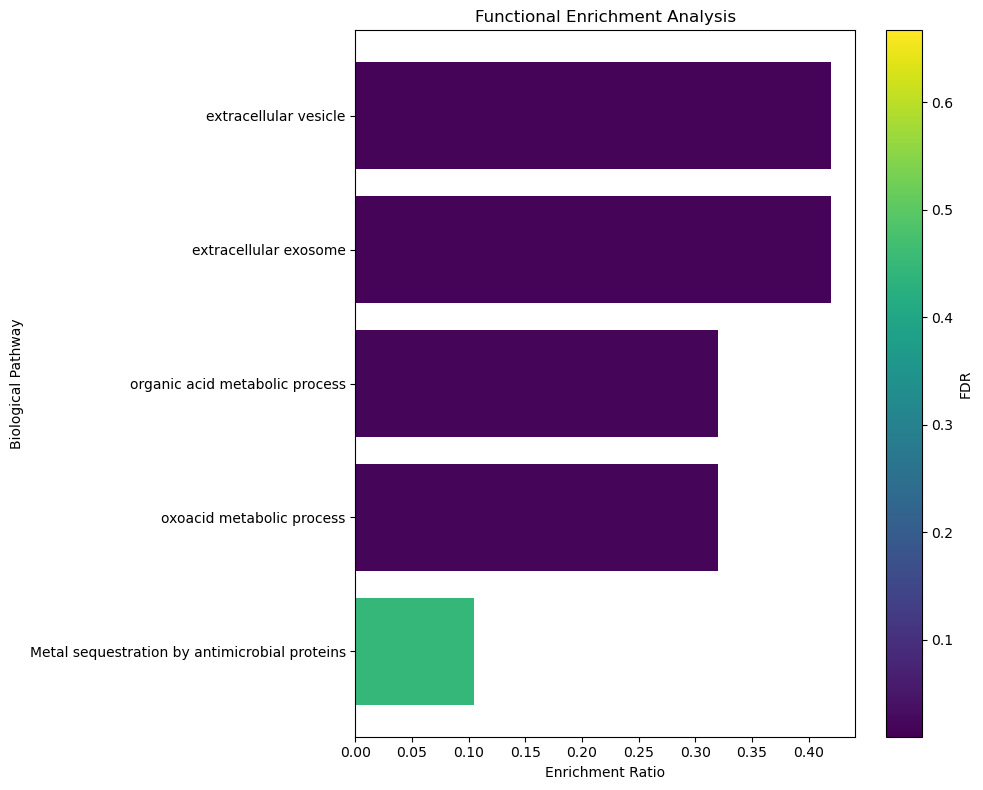

In [118]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Your gProfiler output data (example subset)
data = [
    [1, True, 5.87e-07, 6, 38, 4, 0.105, 0.667, 'REAC:R-HSA-6799990', 'rea', 1, 'Metal sequestration by antimicrobial proteins', 1, 'S100A8,S100A7,LCN2,S100A9'],
    [1, True, 1.08e-05, 1058, 50, 16, 0.32, 0.015, 'GO:0043436', 'BP', 1, 'oxoacid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A'],
    [1, True, 1.32e-05, 1073, 50, 16, 0.32, 0.015, 'GO:0006082', 'BP', 1, 'organic acid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A'],
    [1, True, 4.32e-05, 2133, 50, 21, 0.42, 0.01, 'GO:0070062', 'CC', 1, 'extracellular exosome', 1, 'CD74,TFRC,B4GALT1,RAB3D,GMDS,HGD,SLC2A1,SLPI,IDH1,S100A8,LCN2,LAD1,CLIC6,AQP5,S100A9,KRT8,PGK2,KRT19,C1ORF116,KRT5,S100A14'],
    [1, True, 5.18e-05, 2155, 50, 21, 0.42, 0.01, 'GO:1903561', 'CC', 1, 'extracellular vesicle', 1, 'CD74,TFRC,B4GALT1,RAB3D,GMDS,HGD,SLC2A1,SLPI,IDH1,S100A8,LCN2,LAD1,CLIC6,AQP5,S100A9,KRT8,PGK2,KRT19,C1ORF116,KRT5,S100A14'],
]


# Extracting relevant data for plotting
enrichment_ratios = [d[6] for d in data]
biological_processes = [d[11] for d in data]
fdr_values = [d[7] for d in data]

# Creating the plot
plt.figure(figsize=(10, 8))
bars = plt.barh(biological_processes, enrichment_ratios, color=cm.viridis(fdr_values))

# Adding labels and titles
plt.xlabel('Enrichment Ratio')
plt.ylabel('Biological Pathway')
plt.title('Functional Enrichment Analysis')

# Adding a colorbar separately
sm = cm.ScalarMappable(cmap=cm.viridis)
sm.set_array(fdr_values)
cbar = plt.colorbar(sm, label='FDR')

# Show plot
plt.tight_layout()
plt.show()


## HIGH PREGNANCY ANALYSIS

In [119]:
mean_highpregnancy = highpregnancy_proteins.dropna(axis=1).mean()
sorted_highproteins = mean_highpregnancy.sort_values(ascending=False).dropna()
top_50_proteins = sorted_highproteins.head(50)
print(f'Top Expressed Proteins in EC patients with > 2 pregnancies')

print(top_50_proteins)

Top Expressed Proteins in EC patients with > 2 pregnancies
Name
PRR9        1.495218
CALML3      1.275731
CLGN        1.262309
DKK4        1.247350
KRT5        1.204695
B4GALT5     1.163130
DMBT1       1.108591
KRT17       1.097436
COL2A1      1.081076
GSTM1       1.009364
OLFM4       0.974227
DHCR7       0.956836
GGH         0.939077
VTCN1       0.933594
S100A2      0.926136
KRT6A       0.922180
B4GALT1     0.908682
LTF         0.904955
AQP5        0.898009
SLPI        0.841655
ANPEP       0.833250
S100A8      0.817318
KRT23       0.811261
CTSV        0.811247
IGFBP2      0.790236
CPM         0.777509
CYP4X1      0.777227
STEAP1      0.775491
SEC11C      0.772791
SLC1A5      0.764341
DNAJC10     0.759415
ERMP1       0.758777
SLC12A2     0.752841
FBN2        0.741747
ACBD7       0.733091
GPX2        0.732250
PROM1       0.732064
NRCAM       0.730191
SERPINB5    0.728100
SLC3A2      0.721622
VWA2        0.709682
PLBD1       0.707094
RAB3D       0.705775
SMPDL3B     0.704500
FOLH1       

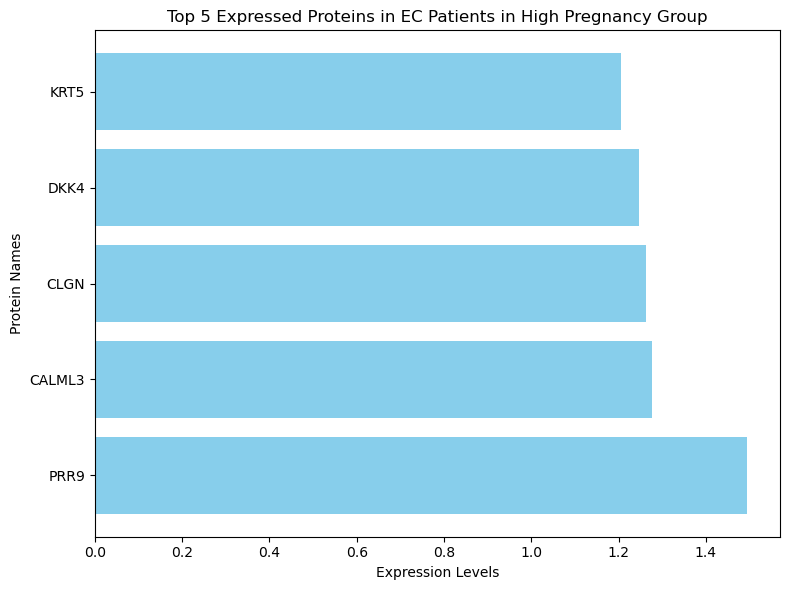

In [109]:
import matplotlib.pyplot as plt

# Data for EC patients with >= 3 pregnancies
protein_names = [
    "PRR9", "CALML3", "CLGN", "DKK4", "KRT5"
]
expression_levels = [
    1.495218, 1.275731, 1.262309, 1.247350, 1.204695
]

# Creating the bar plot for top 5 proteins
plt.figure(figsize=(8, 6))
plt.barh(protein_names, expression_levels, color='skyblue')
plt.xlabel('Expression Levels')
plt.ylabel('Protein Names')
plt.title('Top 5 Expressed Proteins in EC Patients in High Pregnancy Group')

plt.tight_layout()
plt.show()


- PRR9:
- CALML3: enable calcium ion binding activity and enzyme regulator activity
- CLGN: negative prognostic biomarker in liver cancer
- DKK4: downregulated in many cancer types, potential tumor suppressor?
- KRT5: keratin


In [121]:
from gprofiler import GProfiler

# Set your user agent string (replace 'Your_User_Agent' with an appropriate identifier)
user_agent = 'Your_User_Agent'

# Initialize g:Profiler with the user agent
gp = GProfiler(user_agent=user_agent)

# List of genes you want to perform enrichment analysis on
gene_list = [
    'PRR9', 'CALML3', 'CLGN', 'DKK4', 'KRT5', 'B4GALT5', 'DMBT1', 'KRT17', 'COL2A1', 'GSTM1',
    'OLFM4', 'DHCR7', 'GGH', 'VTCN1', 'S100A2', 'KRT6A', 'B4GALT1', 'LTF', 'AQP5', 'SLPI',
    'ANPEP', 'S100A8', 'KRT23', 'CTSV', 'IGFBP2', 'CPM', 'CYP4X1', 'STEAP1', 'SEC11C', 'SLC1A5',
    'DNAJC10', 'ERMP1', 'SLC12A2', 'FBN2', 'ACBD7', 'GPX2', 'PROM1', 'NRCAM', 'SERPINB5', 'SLC3A2',
    'VWA2', 'PLBD1', 'RAB3D', 'SMPDL3B', 'FOLH1', 'IL4I1', 'SLC7A5', 'KRT7', 'SDC1', 'TFRC'
]

# Perform pathway enrichment analysis
enrichment_results = gp.gprofile(organism='hsapiens', query=gene_list)

# Display pathway enrichment results
print(enrichment_results)

[[1, True, 2.1e-10, 2133, 50, 27, 0.54, 0.013, 'GO:0070062', 'CC', 1, 'extracellular exosome', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'], [1, True, 2.7e-10, 2155, 50, 27, 0.54, 0.013, 'GO:1903561', 'CC', 1, 'extracellular vesicle', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'], [1, True, 2.76e-10, 2157, 50, 27, 0.54, 0.013, 'GO:0043230', 'CC', 1, 'extracellular organelle', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'], [1, True, 4.75e-10, 3598, 50, 33, 0.66, 0.009, 'GO:0044421', 'CC', 1, 'extracellular region part', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,PLBD1,SLPI,KRT17,SMPDL3B,GSTM1,K

/var/folders/mx/zc34sw113_ldzx82mcjg1g440000gn/T/ipykernel_2159/3453969071.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='FDR')


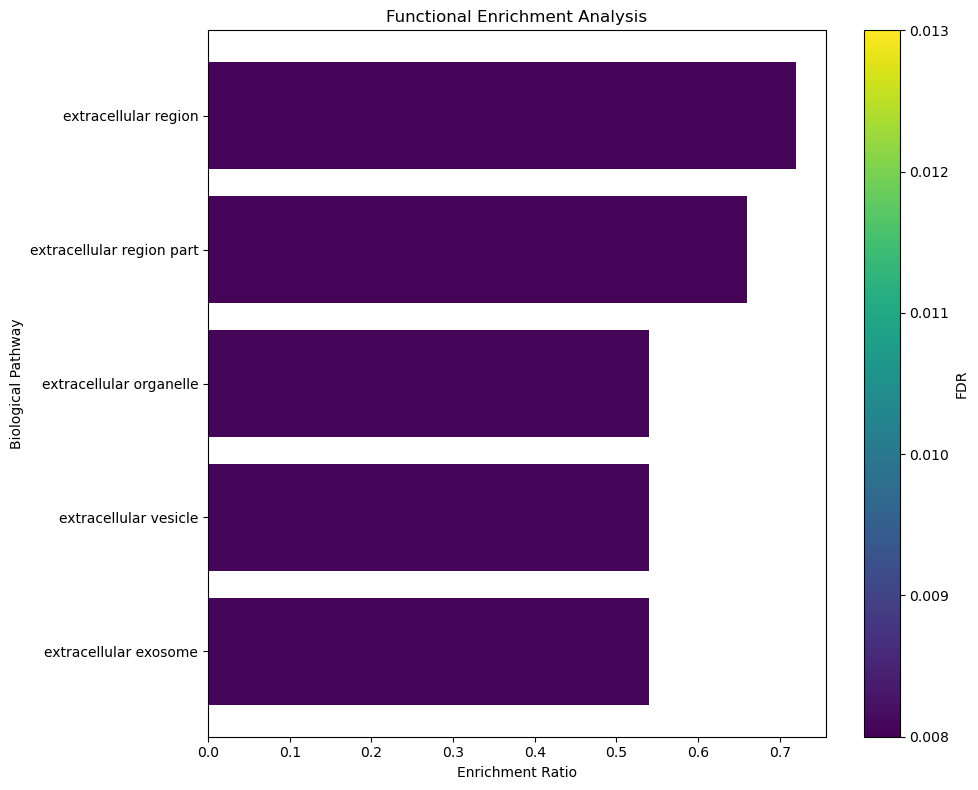

In [123]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Your gProfiler output data (example subset)
data = [
    [1, True, 2.1e-10, 2133, 50, 27, 0.54, 0.013, 'GO:0070062', 'CC', 1, 'extracellular exosome', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'],
    [1, True, 2.7e-10, 2155, 50, 27, 0.54, 0.013, 'GO:1903561', 'CC', 1, 'extracellular vesicle', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'],
    [1, True, 2.76e-10, 2157, 50, 27, 0.54, 0.013, 'GO:0043230', 'CC', 1, 'extracellular organelle', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,SLPI,KRT17,SMPDL3B,KRT7,CPM,GGH,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A'],
    [1, True, 4.75e-10, 3598, 50, 33, 0.66, 0.009, 'GO:0044421', 'CC', 1, 'extracellular region part', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,OLFM4,SLC7A5,SLC1A5,RAB3D,IGFBP2,SDC1,PLBD1,SLPI,KRT17,SMPDL3B,GSTM1,KRT7,CPM,CTSV,GGH,FBN2,COL2A1,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A,SERPINB5'],
    [1, True, 5.24e-10, 4453, 50, 36, 0.72, 0.008, 'GO:0005576', 'CC', 1, 'extracellular region', 1, 'PROM1,LTF,SLC12A2,TFRC,B4GALT1,FOLH1,NRCAM,OLFM4,SLC7A5,DKK4,IL4I1,SLC1A5,RAB3D,IGFBP2,SDC1,PLBD1,SLPI,KRT17,SMPDL3B,GSTM1,KRT7,CPM,CTSV,GGH,FBN2,COL2A1,S100A8,AQP5,VWA2,ANPEP,SLC3A2,CALML3,KRT5,DMBT1,KRT6A,SERPINB5']
]

# Extracting relevant data for plotting
enrichment_ratios = [d[6] for d in data]
biological_processes = [d[11] for d in data]
fdr_values = [d[7] for d in data]

# Creating the plot
plt.figure(figsize=(10, 8))
bars = plt.barh(biological_processes, enrichment_ratios, color=cm.viridis(fdr_values))

# Adding labels and titles
plt.xlabel('Enrichment Ratio')
plt.ylabel('Biological Pathway')
plt.title('Functional Enrichment Analysis')

# Adding a colorbar separately
sm = cm.ScalarMappable(cmap=cm.viridis)
sm.set_array(fdr_values)
cbar = plt.colorbar(sm, label='FDR')

# Show plot
plt.tight_layout()
plt.show()


## DIFFERENTIAL EXPRESSION ANALYSIS

In [99]:
import numpy as np
import pandas as pd

# Handle 'Num_full_term_pregnancies' column
merged_data['Num_full_term_pregnancies'].replace('4 or more', '4', inplace=True)
merged_data['Num_full_term_pregnancies'] = merged_data['Num_full_term_pregnancies'].replace({'Unknown': np.nan}).astype(float)

# Create masks for low and high pregnancy groups
lowpregnancy_mask = merged_data['Num_full_term_pregnancies'].isin([1.0, 2.0])
highpregnancy_mask = merged_data['Num_full_term_pregnancies'].isin([3.0, 4.0])
merged_data.drop(columns='Num_full_term_pregnancies', inplace=True)

# Filter data based on masks
lowpregnancy_proteins = merged_data[lowpregnancy_mask]
highpregnancy_proteins = merged_data[highpregnancy_mask]

# Calculate mean expression levels
mean_lowpregnancy = lowpregnancy_proteins.dropna(axis=1).mean()
mean_highpregnancy = highpregnancy_proteins.dropna(axis=1).mean()

# Calculate absolute difference in expression
expression_difference = np.abs(mean_lowpregnancy - mean_highpregnancy)

# Sort proteins based on absolute expression difference
sorted_proteins = expression_difference.sort_values(ascending=False).dropna()

# Extract top 5 proteins with the largest expression differences
top_50_proteins = sorted_proteins.head(50)

print(f'Top Differentially Expressed Proteins between EC patients with <= 2 vs > 2 pregnancies')
print(top_50_proteins)


Top Differentially Expressed Proteins between EC patients with <= 2 vs > 2 pregnancies
Name
TUBB2B      1.046911
COL2A1      1.043076
CALML3      1.009398
GSTM1       0.997596
GSTM4       0.922644
DMBT1       0.874928
HGD         0.787732
FBN2        0.767188
PGK2        0.765632
OLFM4       0.761568
THSD4       0.748290
RPL22L1     0.707413
CLGN        0.701150
VIL1        0.686481
CKMT1A      0.667093
MOXD1       0.657914
ADH1C       0.657714
GJA1        0.656163
DHCR7       0.646181
HBG1        0.632268
EPM2AIP1    0.614731
PTN         0.608458
RBP1        0.598537
CNTN4       0.594753
ERMP1       0.592975
VKORC1      0.588946
CRELD1      0.585736
PRTFDC1     0.583775
KRT4        0.583302
VTN         0.581431
KRT17       0.579549
MUC13       0.572006
AGR2        0.569682
HPGD        0.569364
NRCAM       0.565701
CFI         0.563681
CRABP2      0.562171
PLEKHS1     0.561074
ENPP3       0.560055
PROM1       0.559948
JCHAIN      0.558620
CPM         0.558071
SLC16A1     0.551854
ACAA2

In [114]:
from gprofiler import GProfiler

# Set your user agent string (replace 'Your_User_Agent' with an appropriate identifier)
user_agent = 'Your_User_Agent'

# Initialize g:Profiler with the user agent
gp = GProfiler(user_agent=user_agent)

# List of genes you want to perform enrichment analysis on
genes_of_interest = [
    'TUBB2B', 'COL2A1', 'CALML3', 'GSTM1', 'GSTM4', 'DMBT1', 'HGD', 'FBN2', 'PGK2', 'OLFM4',
    'THSD4', 'RPL22L1', 'CLGN', 'VIL1', 'CKMT1A', 'MOXD1', 'ADH1C', 'GJA1', 'DHCR7', 'HBG1',
    'EPM2AIP1', 'PTN', 'RBP1', 'CNTN4', 'ERMP1', 'VKORC1', 'CRELD1', 'PRTFDC1', 'KRT4', 'VTN',
    'KRT17', 'MUC13', 'AGR2', 'HPGD', 'NRCAM', 'CFI', 'CRABP2', 'PLEKHS1', 'ENPP3', 'PROM1',
    'JCHAIN', 'CPM', 'SLC16A1', 'ACAA2', 'CDH2', 'GDA', 'F13A1', 'SRPX', 'APCDD1', 'CCT6B'
]


# Perform pathway enrichment analysis
enrichment_results = gp.gprofile(organism='hsapiens', query=genes_of_interest)

# Display pathway enrichment results
print(enrichment_results)

[[1, True, 4.39e-05, 3598, 50, 27, 0.54, 0.008, 'GO:0044421', 'CC', 1, 'extracellular region part', 1, 'PROM1,MOXD1,OLFM4,PTN,AGR2,VTN,HGD,F13A1,VIL1,KRT17,JCHAIN,GSTM1,CPM,FBN2,COL2A1,CRABP2,ENPP3,SLC16A1,HPGD,GSTM4,CDH2,PGK2,MUC13,CALML3,THSD4,DMBT1,CFI'], [1, True, 0.00022, 4453, 50, 29, 0.58, 0.007, 'GO:0005576', 'CC', 1, 'extracellular region', 1, 'PROM1,MOXD1,NRCAM,OLFM4,PTN,AGR2,VTN,HGD,F13A1,VIL1,KRT17,JCHAIN,GSTM1,CPM,FBN2,COL2A1,CRABP2,CNTN4,ENPP3,SLC16A1,HPGD,GSTM4,CDH2,PGK2,MUC13,CALML3,THSD4,DMBT1,CFI'], [1, True, 0.00573, 1669, 50, 16, 0.32, 0.01, 'GO:0042802', 'MF', 1, 'identical protein binding', 1, 'PRTFDC1,OLFM4,AGR2,VTN,HGD,VIL1,JCHAIN,GSTM1,COL2A1,APCDD1,SLC16A1,HPGD,GSTM4,CDH2,MUC13,EPM2AIP1'], [1, True, 0.00638, 3385, 50, 23, 0.46, 0.007, 'GO:0005615', 'CC', 1, 'extracellular space', 1, 'PROM1,MOXD1,OLFM4,PTN,AGR2,VTN,HGD,F13A1,VIL1,KRT17,JCHAIN,CPM,COL2A1,CRABP2,ENPP3,SLC16A1,HPGD,PGK2,MUC13,CALML3,THSD4,DMBT1,CFI'], [1, True, 0.0118, 1987, 50, 17, 0.34, 0.009, '

/var/folders/mx/zc34sw113_ldzx82mcjg1g440000gn/T/ipykernel_2159/1920704800.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='FDR')


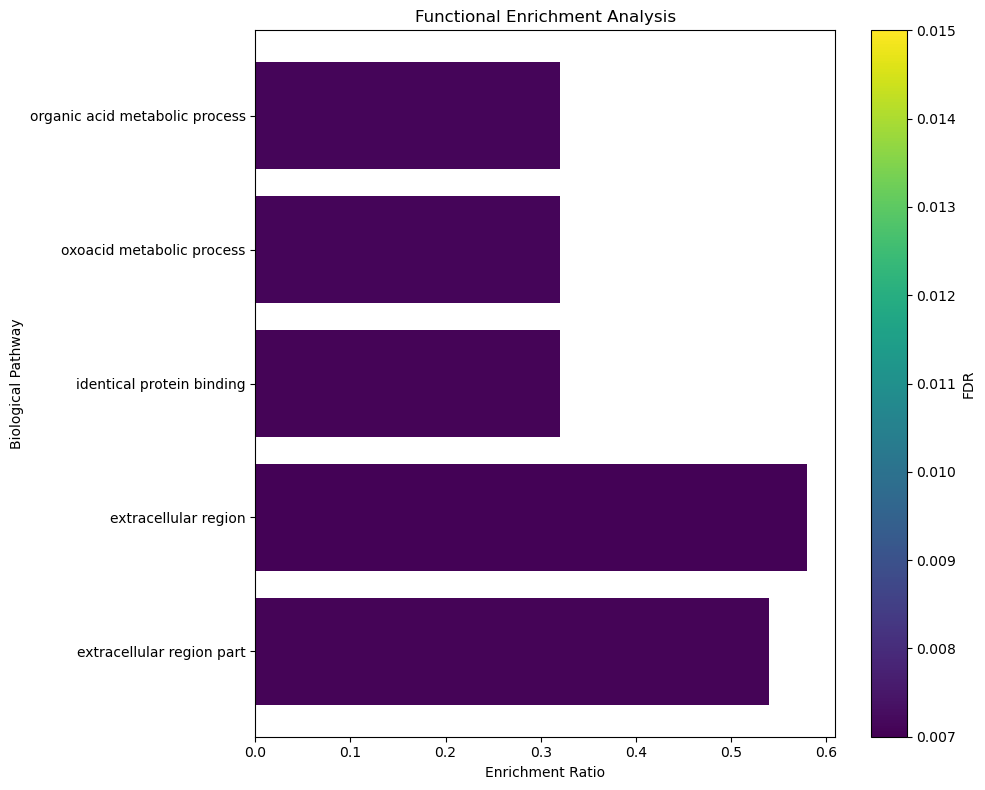

In [115]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Your gProfiler output data (example subset)
data = [
    [1, True, 4.39e-05, 3598, 50, 27, 0.54, 0.008, 'GO:0044421', 'CC', 1, 'extracellular region part', 1, 'PROM1,MOXD1,OLFM4,PTN,AGR2,VTN,HGD,F13A1,VIL1,KRT17,JCHAIN,GSTM1,CPM,FBN2,COL2A1,CRABP2,ENPP3,SLC16A1,HPGD,GSTM4,CDH2,PGK2,MUC13,CALML3,THSD4,DMBT1,CFI'],
    [1, True, 0.00022, 4453, 50, 29, 0.58, 0.007, 'GO:0005576', 'CC', 1, 'extracellular region', 1, 'PROM1,MOXD1,NRCAM,OLFM4,PTN,AGR2,VTN,HGD,F13A1,VIL1,KRT17,JCHAIN,GSTM1,CPM,FBN2,COL2A1,CRABP2,CNTN4,ENPP3,SLC16A1,HPGD,GSTM4,CDH2,PGK2,MUC13,CALML3,THSD4,DMBT1,CFI'],
    [1, True, 0.00573, 1669, 50, 16, 0.32, 0.01, 'GO:0042802', 'MF', 1, 'identical protein binding', 1, 'PRTFDC1,OLFM4,AGR2,VTN,HGD,VIL1,JCHAIN,GSTM1,COL2A1,APCDD1,SLC16A1,HPGD,GSTM4,CDH2,MUC13,EPM2AIP1'],
    [1, True, 1.08e-05, 1058, 50, 16, 0.32, 0.015, 'GO:0043436', 'BP', 1, 'oxoacid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A'],
    [1, True, 1.32e-05, 1073, 50, 16, 0.32, 0.015, 'GO:0006082', 'BP', 1, 'organic acid metabolic process', 1, 'CD74,ALDH18A1,BCAT1,B4GALT1,SCD,HGD,AGMAT,SLC2A1,IDO1,IDH1,GLYATL2,B4GALT5,PGK2,NQO1,PYCR1,CKMT1A']
]


# Extracting relevant data for plotting
enrichment_ratios = [d[6] for d in data]
biological_processes = [d[11] for d in data]
fdr_values = [d[7] for d in data]

# Creating the plot
plt.figure(figsize=(10, 8))
bars = plt.barh(biological_processes, enrichment_ratios, color=cm.viridis(fdr_values))

# Adding labels and titles
plt.xlabel('Enrichment Ratio')
plt.ylabel('Biological Pathway')
plt.title('Functional Enrichment Analysis')

# Adding a colorbar separately
sm = cm.ScalarMappable(cmap=cm.viridis)
sm.set_array(fdr_values)
cbar = plt.colorbar(sm, label='FDR')

# Show plot
plt.tight_layout()
plt.show()


In [124]:
# Genes for which expression levels are needed
genes_of_interest = ["S100A2", "DKK4", "PRR9", "CAPS", "KRT5"]

# Filter the 'mean_highpregnancy' dataset for the genes of interest
expression_high_pregnancy = mean_highpregnancy[genes_of_interest]

print(expression_high_pregnancy)


Name
S100A2    0.926136
DKK4      1.247350
PRR9      1.495218
CAPS      0.669664
KRT5      1.204695
dtype: float64


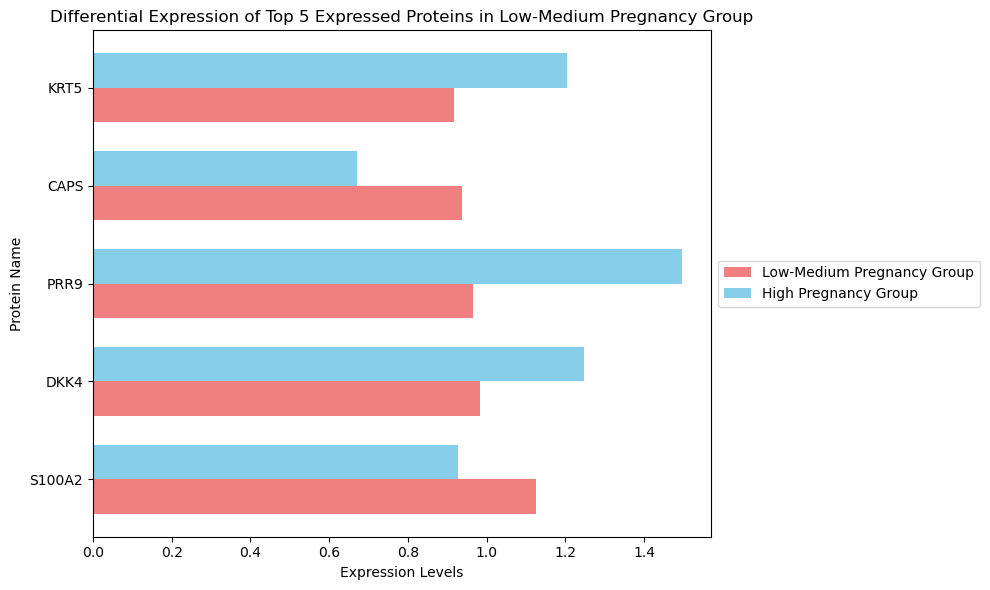

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Data for EC patients with <= 2 pregnancies (low pregnancy group)
low_pregnancy_gene_names = ["S100A2", "DKK4", "PRR9", "CAPS", "KRT5"]
low_pregnancy_expression_levels = [1.124500, 0.982694, 0.965855, 0.937490, 0.917224]

# Data for EC patients with > 2 pregnancies (high pregnancy group)
high_pregnancy_gene_names = ["S100A2", "DKK4", "PRR9", "CAPS", "KRT5"]
high_pregnancy_expression_levels = [0.926136, 1.247350, 1.495218, 0.669664, 1.204695]

# Number of genes
num_genes = len(low_pregnancy_gene_names)

# Create an array of indices for the genes
indices = np.arange(num_genes)

# Define the width for each group of bars
bar_width = 0.35

# Creating the bar plot for top 5 genes with adjusted positions for side-by-side bars
plt.figure(figsize=(10, 6))

# Plotting bars for the low-medium pregnancy group
plt.barh(indices, low_pregnancy_expression_levels, color='lightcoral', height=bar_width, label='Low-Medium Pregnancy Group')

# Plotting bars for the high pregnancy group with adjusted positions
plt.barh(indices + bar_width, high_pregnancy_expression_levels, color='skyblue', height=bar_width, label='High Pregnancy Group')

plt.xlabel('Expression Levels')
plt.ylabel('Protein Name')
plt.title('Differential Expression of Top 5 Expressed Proteins in Low-Medium Pregnancy Group')
plt.yticks(indices + bar_width / 2, low_pregnancy_gene_names)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [139]:
# Genes for which expression levels are needed
genes_of_interest = ["PRR9", "CALML3", "CLGN", "DKK4", "KRT5"]

# Filter the 'mean_highpregnancy' dataset for the genes of interest
expression_low_pregnancy = mean_lowpregnancy[genes_of_interest]

print(expression_low_pregnancy)


Name
PRR9      0.965855
CALML3    0.266333
CLGN      0.561159
DKK4      0.982694
KRT5      0.917224
dtype: float64


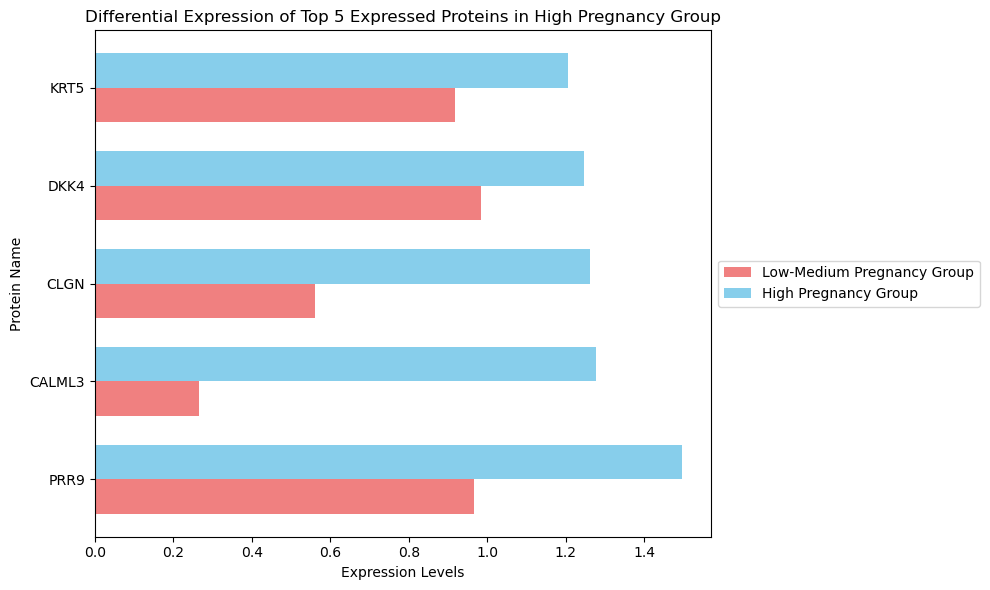

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Data for EC patients with <= 2 pregnancies (low pregnancy group)
low_pregnancy_gene_names = ["PRR9", "CALML3", "CLGN", "DKK4", "KRT5"]
low_pregnancy_expression_levels = [0.965855, 0.266333, 0.561159, 0.982694, 0.917224]

# Data for EC patients with > 2 pregnancies (high pregnancy group)
high_pregnancy_gene_names = ["PRR9", "CALML3", "CLGN", "DKK4", "KRT5"]
high_pregnancy_expression_levels = [1.495218, 1.275731, 1.262309, 1.247350, 1.204695]

# Number of genes
num_genes = len(low_pregnancy_gene_names)

# Create an array of indices for the genes
indices = np.arange(num_genes)

# Define the width for each group of bars
bar_width = 0.35

# Creating the bar plot for top 5 genes with adjusted positions for side-by-side bars
plt.figure(figsize=(10, 6))

# Plotting bars for the low-medium pregnancy group
plt.barh(indices, low_pregnancy_expression_levels, color='lightcoral', height=bar_width, label='Low-Medium Pregnancy Group')

# Plotting bars for the high pregnancy group with adjusted positions
plt.barh(indices + bar_width, high_pregnancy_expression_levels, color='skyblue', height=bar_width, label='High Pregnancy Group')

plt.xlabel('Expression Levels')
plt.ylabel('Protein Name')
plt.title('Differential Expression of Top 5 Expressed Proteins in High Pregnancy Group')
plt.yticks(indices + bar_width / 2, low_pregnancy_gene_names)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [150]:
# Genes for which expression levels are needed
genes_of_interest = ['TUBB2B', 'COL2A1', 'CALML3', 'GSTM1', 'GSTM4']

# Filter the 'mean_highpregnancy' dataset for the genes of interest
expression_low_pregnancy = mean_lowpregnancy[genes_of_interest]

print(expression_low_pregnancy)


# Filter the 'mean_highpregnancy' dataset for the genes of interest
expression_high_pregnancy = mean_highpregnancy[genes_of_interest]

print(expression_high_pregnancy)


Name
TUBB2B   -0.572120
COL2A1    0.038000
CALML3    0.266333
GSTM1     0.011767
GSTM4    -0.542553
dtype: float64
Name
TUBB2B    0.474791
COL2A1    1.081076
CALML3    1.275731
GSTM1     1.009364
GSTM4     0.380091
dtype: float64


top 5 differentially expressed proteins: 'TUBB2B', 'COL2A1', 'CALML3', 'GSTM1', 'GSTM4'

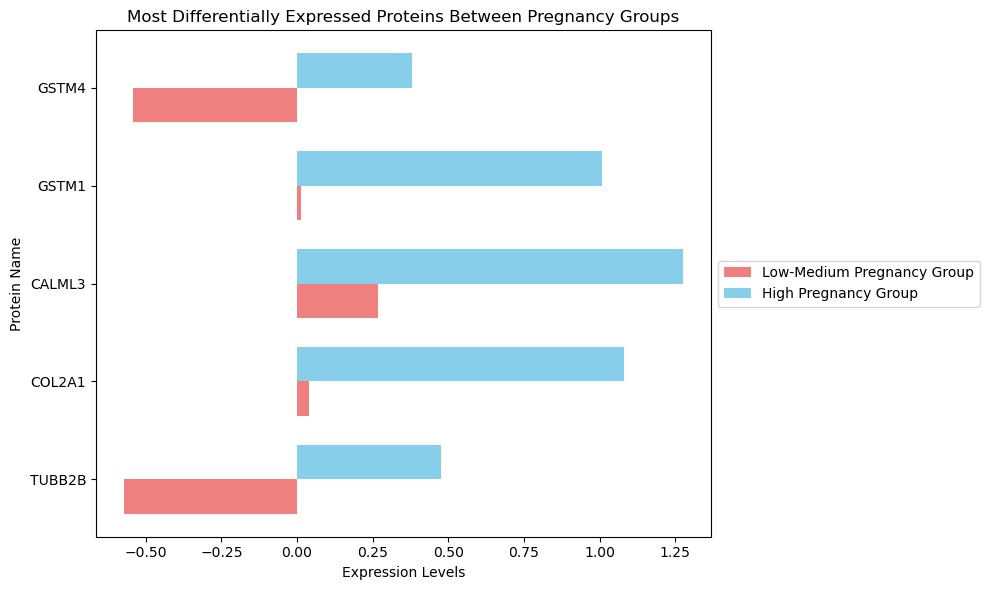

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Data for EC patients with <= 2 pregnancies (low pregnancy group)
low_pregnancy_gene_names = ['TUBB2B', 'COL2A1', 'CALML3', 'GSTM1', 'GSTM4']
low_pregnancy_expression_levels = [-0.572120, 0.038000, 0.266333, 0.011767, -0.542553]

# Data for EC patients with > 2 pregnancies (high pregnancy group)
high_pregnancy_gene_names = ['TUBB2B', 'COL2A1', 'CALML3', 'GSTM1', 'GSTM4']
high_pregnancy_expression_levels = [0.474791, 1.081076, 1.275731, 1.009364, 0.380091]

# Number of genes
num_genes = len(low_pregnancy_gene_names)

# Create an array of indices for the genes
indices = np.arange(num_genes)

# Define the width for each group of bars
bar_width = 0.35

# Creating the bar plot for top 5 genes with adjusted positions for side-by-side bars
plt.figure(figsize=(10, 6))

# Plotting bars for the low-medium pregnancy group
plt.barh(indices, low_pregnancy_expression_levels, color='lightcoral', height=bar_width, label='Low-Medium Pregnancy Group')

# Plotting bars for the high pregnancy group with adjusted positions
plt.barh(indices + bar_width, high_pregnancy_expression_levels, color='skyblue', height=bar_width, label='High Pregnancy Group')

plt.xlabel('Expression Levels')
plt.ylabel('Protein Name')
plt.title('Most Differentially Expressed Proteins Between Pregnancy Groups')
plt.yticks(indices + bar_width / 2, low_pregnancy_gene_names)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
